In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('/content/drive/MyDrive/MSCS/My_Project/cars.csv', encoding='latin-1')

In [18]:
df.describe()

,ID_SELLER,id,Year of Make,Milage,price
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,3.776796e+06,5.380237e+07,2020.281000,54115.264000,1.826373e+05
std,4.947333e+05,3.064649e+05,3.893482,42319.750478,2.647510e+05
min,3.846000e+03,5.152898e+07,1976.000000,0.000000,1.990000e+04
25%,3.842669e+06,5.363487e+07,2018.000000,19918.000000,7.742250e+04
50%,3.876060e+06,5.386884e+07,2022.000000,48000.000000,1.153950e+05
75%,3.916184e+06,5.404534e+07,2023.000000,78628.250000,1.798925e+05
max,3.958715e+06,5.417847e+07,2025.000000,295000.000000,3.650000e+06


In [20]:
df.shape

(1000, 12)

In [21]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 6
Integer variables: 5
Float variables: 0


<Axes: >

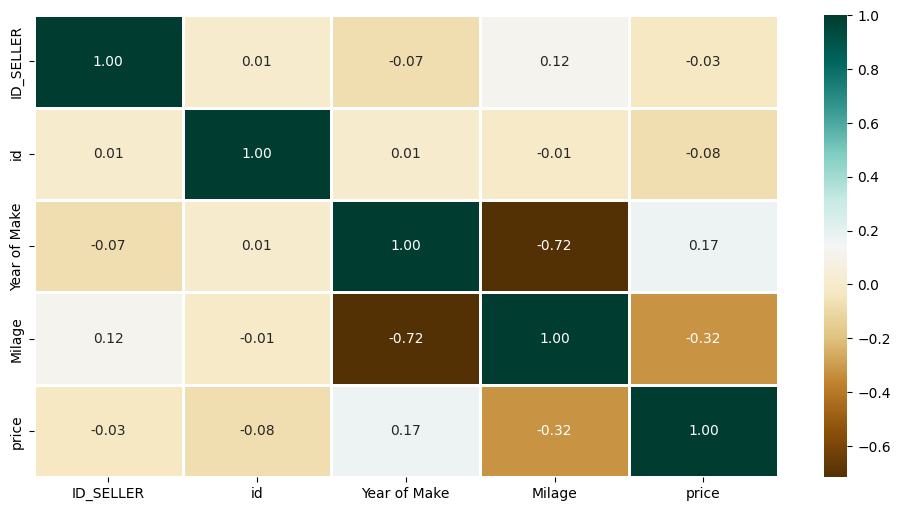

In [23]:
# Select only numerical features for correlation analysis
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

# This code is modified by Susobhan Akhuli


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

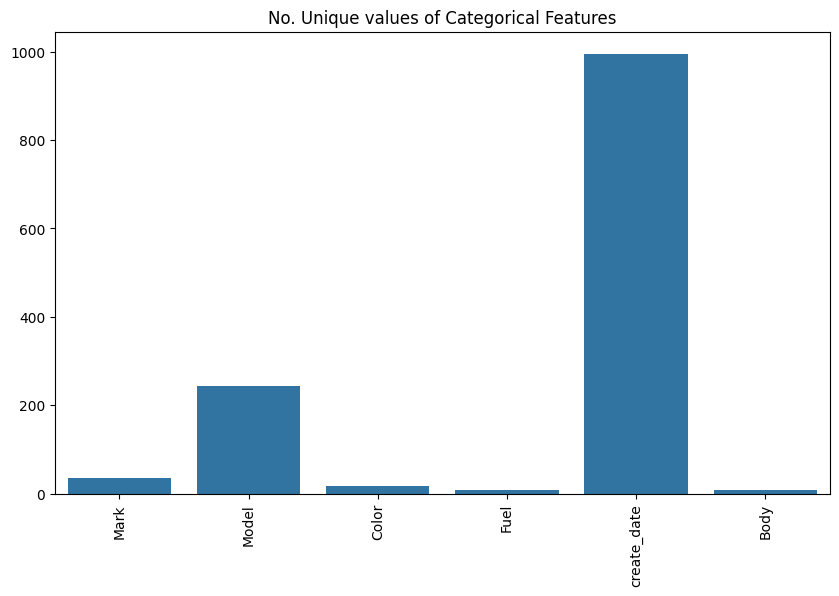

In [25]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

<ipython-input-26-2ad93bcd86d3>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 139 (\x8b) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_fi

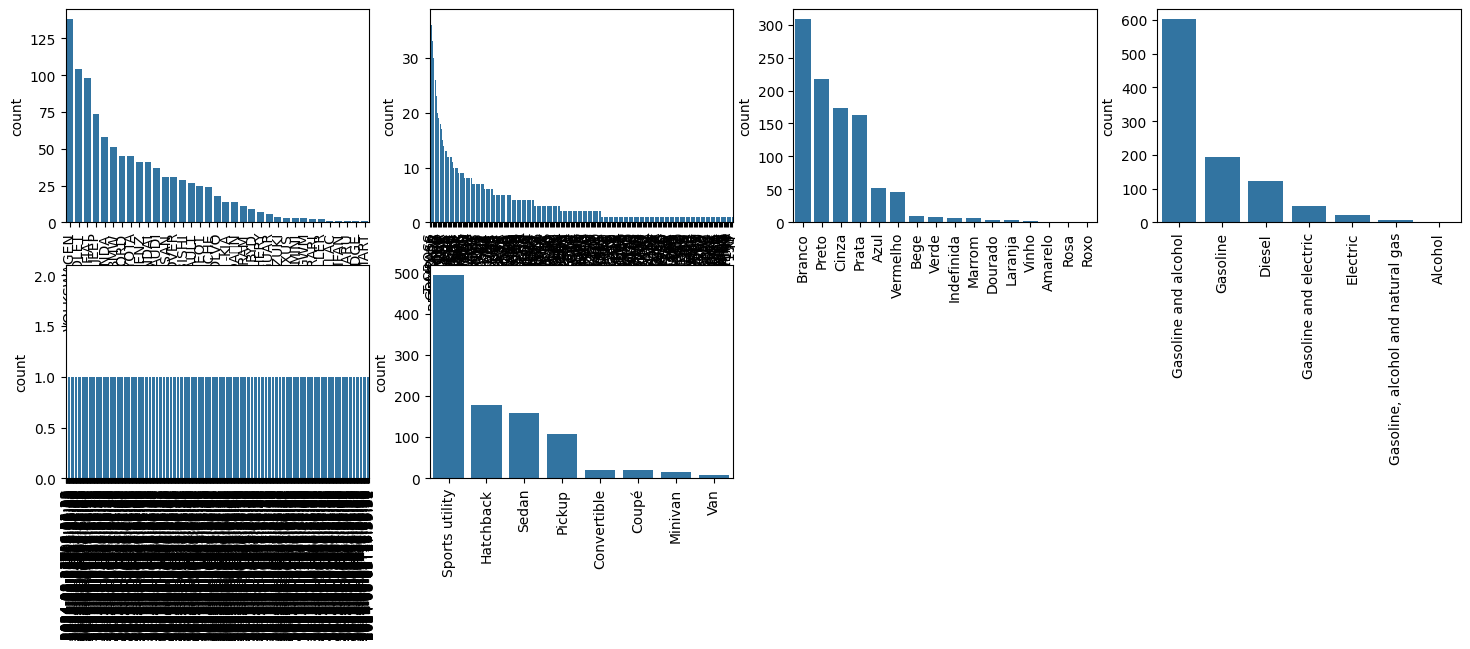

In [26]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [30]:
df.drop(['ID_SELLER'],
             axis=1,
             inplace=True)

In [29]:
df.drop(['id'],
             axis=1,
             inplace=True)

In [31]:
df['price'] = df['price'].fillna(
  df['price'].mean())

In [32]:
new_dataset = df.dropna()

In [33]:
new_dataset.isnull().sum()

Mark            0
Model           0
Year of Make    0
Milage          0
Color           0
price           0
Fuel            0
Seller Type     0
create_date     0
Body            0
dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))


Categorical variables:
['Mark', 'Model', 'Color', 'Fuel', 'create_date', 'Body']
No. of. categorical features:  6


In [35]:
OH_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['price'], axis=1)
Y = df_final['price']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [37]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.4845018403372879


In [38]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.2281677273917061

In [39]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.3261325495042789
